# Boston housing: a regression  with regularization


The objective is to predict the house price in a certain Boston suburb (in the 1970s).

In [10]:
# Download the data and import stuff

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [11]:
# Normalize the data and keep 300 samples for training (rest for validation)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

partial_train_data = train_data[:300]
partial_train_targets = train_targets[:300]
val_data = train_data[300:]
val_targets = train_targets[300:]

In [12]:
# Build the model and train it
# You can pick what you want from three alternatives, and comment out the two others

model = Sequential()
# 1) This is the model without any regularization
model.add(Dense(64, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
#
# 2) This is the same model with L2 regularization
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# 3) This is the same model with dropout
#model.add(Dense(64, activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(partial_train_data, partial_train_targets,
                    epochs=400, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

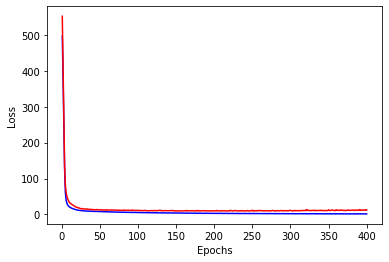

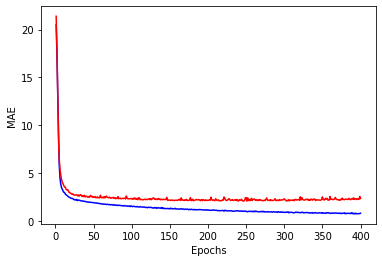

In [13]:
# Plot the loss score and mean absolute error for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

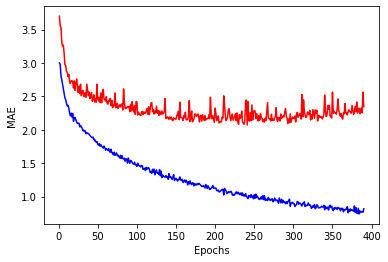

In [14]:
# Cut off the first few MAE data points for clarity

short_mae = mae[10:]
short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.plot(range(1,len(short_mae)+1), short_mae, 'b-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

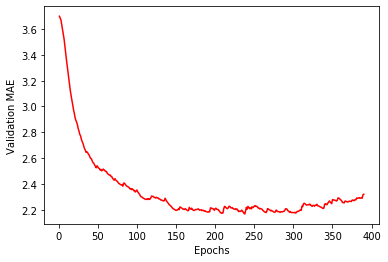

In [15]:
# Smoothen the previous curve to reduce noise

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae,'r-')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
# Build a fresh model (again, three alternatives) ...

model = Sequential()
# 1) This is the model without any regularization
model.add(Dense(64, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
#
# 2) This is the same model with L2 regularization
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# 3) This is the same model with dropout
#model.add(Dense(64, activation='relu',
#            input_shape=(train_data.shape[1],)))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [17]:
# ... and train it with the entire training data. Select "epochs" from the validation graphs above.
# After that, make the final evaluation with test data.

model.fit(train_data, train_targets, epochs=200, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 525us/sample - loss: 15.0039 - mean_absolute_error: 2.6307
